In [1]:
"""
Rhode Schwarz (BatMaus) Demo
Author: Andrei V.
"""

# from slab import *
# from slab.datamanagement import SlabFile
import numpy as np
import os
import datetime
import os.path
from importlib import reload
import matplotlib.pyplot as plt
%matplotlib notebook

import RhodeSchwarz
reload(RhodeSchwarz)

from RhodeSchwarz import RhodeSchwarz
from RhodeSchwarz import ZVB8


Warning could not load Chase AWG dll, check that dll located at 'C:\_Lib\python\slab\instruments\awg\chase\dax22000_lib_DLL32.dll'
Could not load InstrumentManagerWindow
Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten64.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps64.dll'
Could not load labbrick


C:\ProgramData\Anaconda3\envs\py36vis\lib\site-packages\IPython\qt.py:13: ShimWarning: The `IPython.qt` package has been deprecated since IPython 4.0. You should import from qtconsole instead.
  "You should import from qtconsole instead.", ShimWarning)


Warning could not load LDA labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_atten64.dll'
Warning could not load LMS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\vnx_fmsynth.dll'
Warning could not load LPS labbrick dll, check that dll located at 'C:\_Lib\python\slab\instruments\labbrick\VNX_dps64.dll'
Could not load labbrick
Could not load BKPowerSupply
Could not load Autonics TM4 Driver


In [2]:
# rs = RhodeSchwarz(address='192.168.14.190')
rs = ZVB8(address='192.168.14.231', reset = True)

In [3]:
rs.get_id()

I'm Bat Mouse!


'Rohde-Schwarz,ZNB8-4Port,1311601044101437,3.20\n'

# Q0

## Find readout

In [11]:
trans_settings = rs.trans_default_settings()
trans_settings['start_freq'] = 6.164655e9-2.5e6
trans_settings['stop_freq'] = 6.164655e9+2.5e6
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 200
trans_settings['RFpower'] = -25
trans_settings['freq_points'] = 1001
trans_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 6162155000.0,
 'stop_freq': 6167155000.0,
 'freq_points': 1001,
 'RFpower': -25,
 'ifBW': 200,
 'mode': 'MOV'}

In [12]:
data = rs.trans_meas(trans_settings)

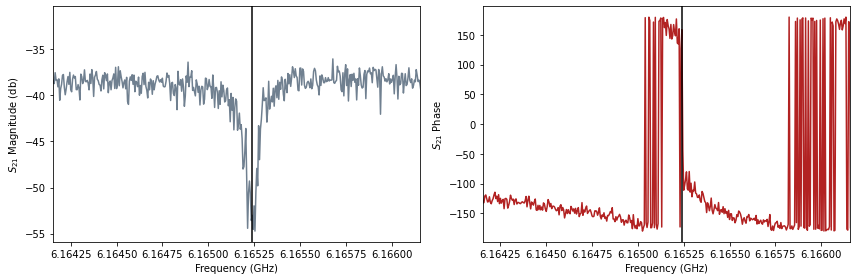

In [17]:
span = 6.164655 + np.array([-0.5,1.5])*1e-3
marker = 6.16524

fig, ax = plt.subplots(1,2,figsize=(12, 4));

ax1 = ax[0]
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

ax1 = ax[1]
ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Phase');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

plt.tight_layout()

## Qubit low power -5dbm

In [18]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2

spec_settings['start_freq'] = 4.7789e9 - 50e6
spec_settings['stop_freq'] = 4.7789e9 + 50e6
spec_settings['RFpower'] = -5
spec_settings['CAVfreq'] = 6.16524e9
spec_settings['CAVpower'] = -25
spec_settings['avg_time'] = 10
spec_settings['ifBW'] = 1000
trans_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'

spec_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 4728900000.0,
 'stop_freq': 4828900000.0,
 'freq_points': 1001,
 'RFpower': -5,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -25,
 'CAVfreq': 6165240000.0,
 'ifBW': 1000,
 'mode': 'MOV'}

In [19]:
data = []
data = rs.spec_meas(spec_settings)

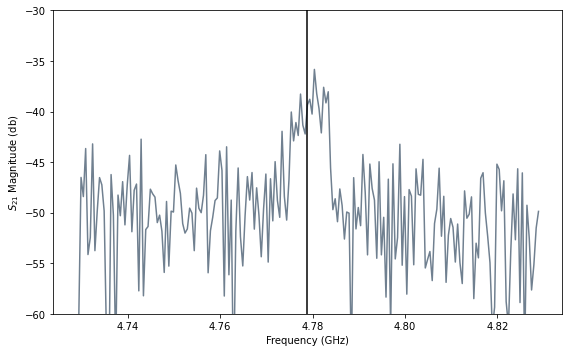

In [20]:
# span = 6.166976 + np.array([-1,2])*1e-3
marker = 4.7789

fig, ax = plt.subplots(figsize=(8, 5));

ax1 = ax
ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
# ax1.set_xlim(span)
ax1.set_ylim([-60,-30])
ax1.axvline(marker , color = 'k')


plt.tight_layout()

## Resonator Transmission with SignalCore on @ this freq (-10dBm)

In [2]:
from slab import *
from slab.instruments import *
sc = SignalCore(name="SignalCore",address="100026C2")


In [3]:
sc.get_id()

'Default Instrument SignalCore'

In [4]:
sc.open_device()

2770693029936

In [5]:
sc.get_rf_parameters()

OSError: exception: access violation reading 0x0000000000000020

In [ ]:
rfparams = sc.get_rf_parameters()
time.sleep(0.2)
settingparams = sc.get_device_status()
time.sleep(0.2)
print(" ==== DRIVE LO SETTINGS ==== ")
print("RF1 OUT ENABLED: %s"%settingparams.operate_status.rf1_out_enable)
print("RF1 STANDBY: %s"%settingparams.operate_status.rf1_standby)
print("RF1 EXT REF DETECTED: %s"%settingparams.operate_status.ext_ref_detect)
print("RF1 FREQ: %s"%(rfparams.rf1_freq))
print("RF1 LEVEL: %s"%(rfparams.rf_level))

## Forget that - manual USB front panel control

In [27]:
trans_settings = rs.trans_default_settings()
trans_settings['start_freq'] = 6.164655e9-4.5e6
trans_settings['stop_freq'] = 6.164655e9+2.5e6
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 200
trans_settings['RFpower'] = -25
trans_settings['freq_points'] = 1001
trans_settings

{'channel': 1,
 'avg_time': 10,
 'measurement': 'S21',
 'start_freq': 6160155000.0,
 'stop_freq': 6167155000.0,
 'freq_points': 1001,
 'RFpower': -25,
 'ifBW': 200,
 'mode': 'MOV'}

In [28]:
data = rs.trans_meas(trans_settings)

## LO on

<IPython.core.display.Javascript object>


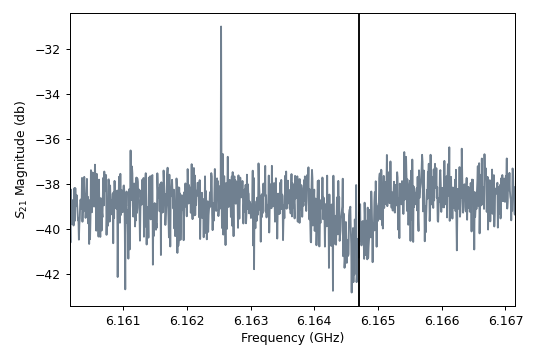

In [31]:
span = 6.164655 + np.array([-4.5,2.5])*1e-3
marker = 6.1647

fig, ax = plt.subplots(1,1,figsize=(6, 4));

ax1 = ax
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

# ax1 = ax[1]
# ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
# ax1.set_xlabel('Frequency (GHz)');
# ax1.set_ylabel('$S_{21}$ Phase');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

plt.tight_layout()

## LO off

<IPython.core.display.Javascript object>


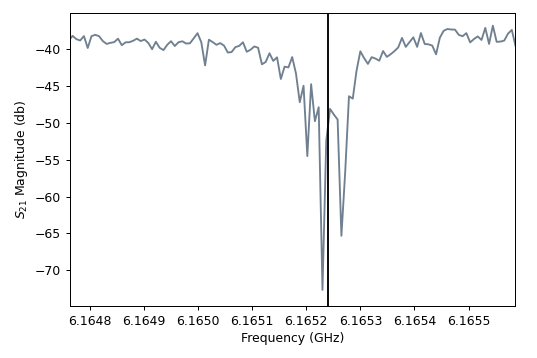

In [26]:
span = 6.164655 + np.array([-4.5,2.5])*1e-3
marker = 6.16524

fig, ax = plt.subplots(1,1,figsize=(6, 4));

ax1 = ax
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

# ax1 = ax[1]
# ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
# ax1.set_xlabel('Frequency (GHz)');
# ax1.set_ylabel('$S_{21}$ Phase');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

plt.tight_layout()

## Qubit drive at estimated anharmonicity

In [38]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2

spec_settings['start_freq'] = 4.7789e9 - 30e6 - 237e6
spec_settings['stop_freq'] = 4.7789e9 + 30e6 - 237e6
spec_settings['RFpower'] = -5
spec_settings['CAVfreq'] = 6.16524e9
spec_settings['CAVpower'] = -25
spec_settings['avg_time'] = 120
spec_settings['ifBW'] = 1000
trans_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'

spec_settings

{'channel': 1,
 'avg_time': 120,
 'measurement': 'S21',
 'start_freq': 4511900000.0,
 'stop_freq': 4571900000.0,
 'freq_points': 1001,
 'RFpower': -5,
 'RFport': 3,
 'Mport': 2,
 'CAVport': 1,
 'CAVpower': -25,
 'CAVfreq': 6165240000.0,
 'ifBW': 1000,
 'mode': 'MOV'}

In [39]:
data = []
data = rs.spec_meas(spec_settings)

<IPython.core.display.Javascript object>


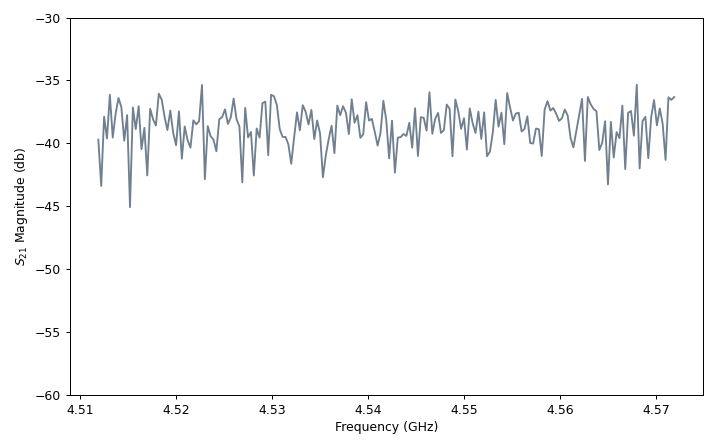

In [44]:
# span = 6.166976 + np.array([-1,2])*1e-3
# marker = 4.7789

fig, ax = plt.subplots(figsize=(8, 5));

ax1 = ax
ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
# ax1.set_xlim(span)
ax1.set_ylim([-60,-30])
# ax1.axvline(marker , color = 'k')


plt.tight_layout()

## Maybe qubit drifted

<IPython.core.display.Javascript object>


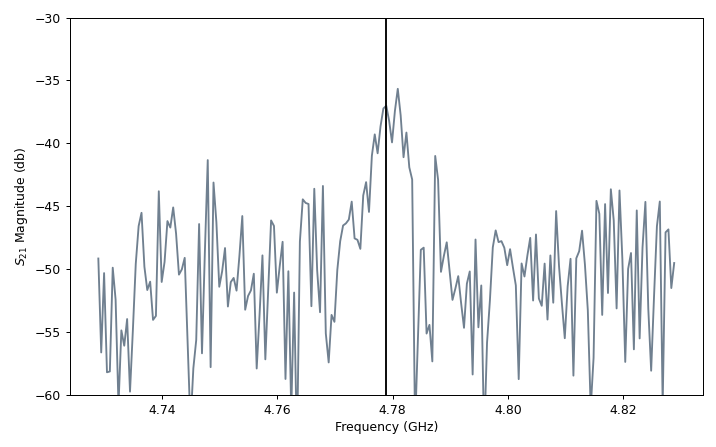

In [45]:
rs.reset()

spec_settings = rs.spec_default_settings()
spec_settings['CAVport'] = 1
spec_settings['RFport'] = 3
spec_settings['Mport'] = 2

spec_settings['start_freq'] = 4.7789e9 - 50e6
spec_settings['stop_freq'] = 4.7789e9 + 50e6
spec_settings['RFpower'] = -5
spec_settings['CAVfreq'] = 6.16524e9
spec_settings['CAVpower'] = -25
spec_settings['avg_time'] = 10
spec_settings['ifBW'] = 1000
trans_settings['freq_points'] = 1001
spec_settings['measurement'] = 'S21'

spec_settings
data = []
data = rs.spec_meas(spec_settings)
# span = 6.166976 + np.array([-1,2])*1e-3
marker = 4.7789

fig, ax = plt.subplots(figsize=(8, 5));

ax1 = ax
ax1.plot(data['freq']/1e9, data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
# ax1.set_xlim(span)
ax1.set_ylim([-60,-30])
ax1.axvline(marker , color = 'k')


plt.tight_layout()

## Try to imporve |e> signal - 0dBm sig core drive

In [62]:
trans_settings = rs.trans_default_settings()
trans_settings['start_freq'] = 6.164655e9-6.5e6
trans_settings['stop_freq'] = 6.164655e9+6.5e6
trans_settings['avg_time'] = 10
trans_settings['ifBW'] = 200
trans_settings['RFpower'] = -25
trans_settings['freq_points'] = 1001
trans_settings

data = rs.trans_meas(trans_settings)


## -30dBm

<IPython.core.display.Javascript object>


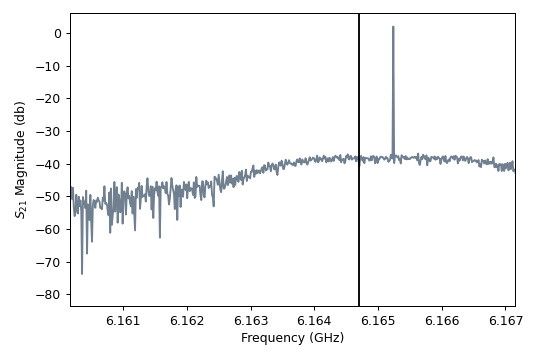

In [63]:
span = 6.164655 + np.array([-4.5,2.5])*1e-3
marker = 6.1647

fig, ax = plt.subplots(1,1,figsize=(6, 4));

ax1 = ax
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

# ax1 = ax[1]
# ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
# ax1.set_xlabel('Frequency (GHz)');
# ax1.set_ylabel('$S_{21}$ Phase');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

plt.tight_layout()

## -20dBm

<IPython.core.display.Javascript object>


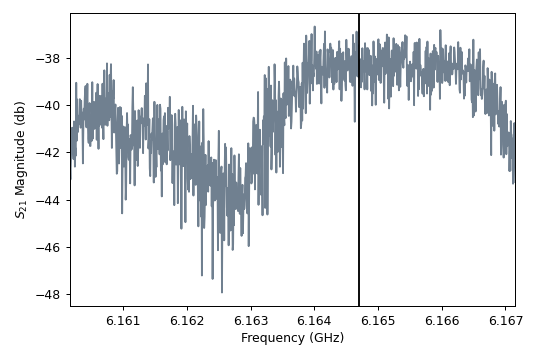

In [57]:

span = 6.164655 + np.array([-4.5,2.5])*1e-3
marker = 6.1647

fig, ax = plt.subplots(1,1,figsize=(6, 4));

ax1 = ax
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

# ax1 = ax[1]
# ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
# ax1.set_xlabel('Frequency (GHz)');
# ax1.set_ylabel('$S_{21}$ Phase');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

plt.tight_layout()

In [52]:
## -10dBm

<IPython.core.display.Javascript object>


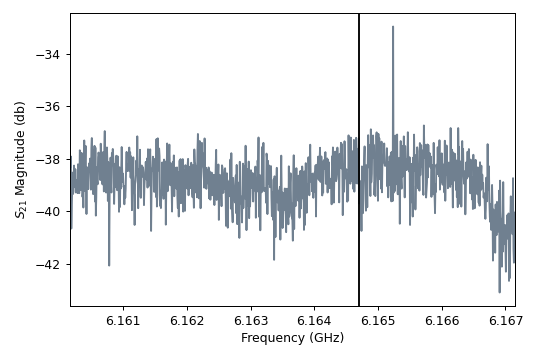

In [53]:

span = 6.164655 + np.array([-4.5,2.5])*1e-3
marker = 6.1647

fig, ax = plt.subplots(1,1,figsize=(6, 4));

ax1 = ax
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

# ax1 = ax[1]
# ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
# ax1.set_xlabel('Frequency (GHz)');
# ax1.set_ylabel('$S_{21}$ Phase');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

plt.tight_layout()

In [50]:
## 0dBm

C:\ProgramData\Anaconda3\envs\py36vis\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


<IPython.core.display.Javascript object>


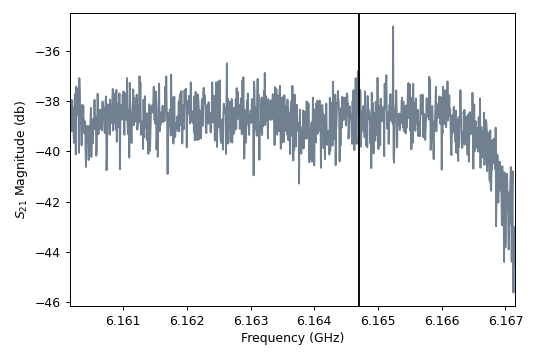

In [47]:

span = 6.164655 + np.array([-4.5,2.5])*1e-3
marker = 6.1647

fig, ax = plt.subplots(1,1,figsize=(6, 4));

ax1 = ax
ax1.plot(data['freq']/1e9,data['mag'], color = 'slategrey')
ax1.set_xlabel('Frequency (GHz)');
ax1.set_ylabel('$S_{21}$ Magnitude (db)');
ax1.set_xlim(span)
ax1.axvline(marker , color = 'k')

# ax1 = ax[1]
# ax1.plot(data['freq']/1e9,data['phase'], color = 'firebrick')
# ax1.set_xlabel('Frequency (GHz)');
# ax1.set_ylabel('$S_{21}$ Phase');
# ax1.set_xlim(span)
# ax1.axvline(marker , color = 'k')

plt.tight_layout()